<font size = 5>**SALES DEPARTMENT**

##**Importing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##**Data Understanding**

###Data Exploration

Mengimpor data  menggunakan metode .read_csv() dan juga menambahkan parameter "encoding='latin'".


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ruangguru CAMP/Final Projects/dept.sales 3.csv', encoding='latin')
# df = pd.read_csv('data.csv', encoding='latin')
df.head()

,order_id,product_id,product_names,num_of_item,created_at,sale_price,user_id,country
0,69979,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,1,2022-05-17 07:06:19+00:00,2.5,56200,United Kingdom
1,44006,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,3,2021-01-21 04:56:58+00:00,2.5,35515,France
2,28129,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,1,2021-07-26 04:06:18+00:00,2.5,22712,Brasil
3,27384,28951,Nice Shades Black One Size Canvas Military Web...,4,2022-02-12 14:40:47+00:00,3.0,22099,China
4,44991,28951,Nice Shades Black One Size Canvas Military Web...,1,2022-04-06 00:21:51+00:00,3.0,36298,United Kingdom


In [ ]:
df.tail() #memperlihatkan n baris akhir dari sebuah pandas dataframe (default n = 5)

,order_id,product_id,product_names,num_of_item,created_at,sale_price,user_id,country
101406,9921,23352,Vans Geary Shorts Black Mens,1,2021-09-05 02:04:33+00:00,37.950001,8140,Brasil
101407,61583,26968,Shawl Collar Waffle Diamond pattern White Colo...,2,2020-01-28 10:44:16+00:00,37.950001,49546,Brasil
101408,72138,24641,Smartwool PhD Run Graduated Compression Ultra ...,1,2022-05-31 15:26:30.845293+00:00,37.950001,57932,China
101409,121143,17084,Volcom Men's Mole Long Sleeve Thermal Top,2,2021-11-12 03:44:29+00:00,37.950001,97308,China
101410,16718,27463,Columbia Men's Whidbey Ii Water Short,1,2020-01-09 04:43:54+00:00,37.950001,13567,United States


Melihat 5 baris pertama agar dapat memahami struktur dan tipe data yang ada dalam kumpulan data. Kita dapat melihat bahwa kita harus berurusan dengan data timeseries, integers and floats, categorical and text.

In [ ]:
df.columns #memperlihatkan nama kolom dari sebuah pandas dataframe

Index(['order_id', 'product_id', 'product_names', 'num_of_item', 'created_at',
       'sale_price', 'user_id', 'country'],
      dtype='object')

In [ ]:
df.shape #shape adalah tuple yang memberikan informasi dimensi dari sebuah array

(101411, 8)

In [ ]:
#Informasi Fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101411 entries, 0 to 101410
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       101411 non-null  int64  
 1   product_id     101411 non-null  int64  
 2   product_names  101405 non-null  object 
 3   num_of_item    101411 non-null  int64  
 4   created_at     101411 non-null  object 
 5   sale_price     101411 non-null  float64
 6   user_id        101411 non-null  int64  
 7   country        101411 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 6.2+ MB


###Quick statistical overview

In [ ]:
df.describe()

,order_id,product_id,num_of_item,sale_price,user_id
count,101411.000000,101411.000000,101411.000000,101411.000000,101411.000000
mean,62414.970023,15232.548570,1.892388,74.134741,50176.861761
std,35949.993812,8435.840582,1.059220,74.190870,28806.110675
min,1.000000,1.000000,1.000000,0.020000,1.000000
25%,31303.000000,7750.000000,1.000000,29.270000,25290.000000
50%,62545.000000,16357.000000,2.000000,53.500000,50291.000000
75%,93540.000000,22378.000000,2.000000,92.000000,75071.500000
max,124512.000000,29120.000000,4.000000,999.000000,100000.000000


###Dealing with types

Untuk memahami apa yang kita miliki saat ini dan data apa yang harus di casted untuk memperbaiki tipe.

In [ ]:
df.dtypes

order_id           int64
product_id         int64
product_names     object
num_of_item        int64
created_at        object
sale_price       float64
user_id            int64
country           object
dtype: object

In [ ]:
df['product_id'] =df['product_id'].astype(str)
df['order_id'] =df['order_id'].astype(str)
df['user_id'] =df['user_id'].astype(str)


In [ ]:
#menghapus time pada kolom returned_at
df['created_at'] = pd.to_datetime(df['created_at']).dt.date


In [ ]:
#mengubah menjadi tipe datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.set_index('created_at')

In [ ]:
df.dtypes

order_id          object
product_id        object
product_names     object
num_of_item        int64
sale_price       float64
user_id           object
country           object
dtype: object

In [ ]:
df.loc["2020"]


,order_id,product_id,product_names,num_of_item,sale_price,user_id,country
created_at,,,,,,,
2020-12-02,50579,24793,LRG Crew Sock,1,5.000000,40704,United States
2020-09-22,58621,24793,LRG Crew Sock,2,5.000000,47181,Brasil
2020-06-23,74441,28785,Classic Wayfarer Style Sunglasses Large Lens S...,1,6.000000,59754,China
2020-10-24,109626,9303,Pediquette by Peds 3 Pair No Show Footies NUDE...,2,6.000000,88014,China
2020-07-01,95868,11029,Levusha Fashions Ladies Panties Fine Nylon Spa...,2,6.000000,76908,Germany
...,...,...,...,...,...,...,...
2020-11-22,103567,18388,Smartwool PhD Run Graduated Compression Ultra ...,1,37.950001,83164,France
2020-11-04,1114,17084,Volcom Men's Mole Long Sleeve Thermal Top,2,37.950001,892,China
2020-09-01,114692,12371,Laura High Quality Sexy Aqua Fuchsia Puhs-up B...,2,37.950001,92138,Australia


##**Exploratory Data Analysis**

###Dealing with null values

Selanjutnya mencari missing value yang terdapat pada data

In [ ]:
df.isnull().sum()

order_id         0
product_id       0
product_names    6
num_of_item      0
sale_price       0
user_id          0
country          0
dtype: int64

In [ ]:
df[df['product_names'].isnull()].head()

,order_id,product_id,product_names,num_of_item,sale_price,user_id,country
created_at,,,,,,,
2022-05-11,106438,24455,NaN,2,147.990005,85440,China
2021-06-21,12752,24455,NaN,1,147.990005,10414,China
2022-04-29,21946,24455,NaN,1,147.990005,17787,United States
2021-09-05,100832,24455,NaN,1,147.990005,80888,United States
2021-02-16,32324,24455,NaN,2,147.990005,26127,China


In [ ]:
#menghapus missing value pada product_names
df.dropna(subset = ["product_names"], inplace =True )
df.isnull().sum()

order_id         0
product_id       0
product_names    0
num_of_item      0
sale_price       0
user_id          0
country          0
dtype: int64

###Checking out columns separately

In [ ]:
df['product_names'].value_counts().head()

7 For All Mankind Men's Standard Classic Straight Leg Jean    51
7 For All Mankind Men's Austyn Relaxed Straight Leg Jean      32
HUGO BOSS Men's Long Pant                                     30
Rusty Men's Goombah Too Boardshort                            30
FULL TILT Basic Womens Hoodie                                 29
Name: product_names, dtype: int64

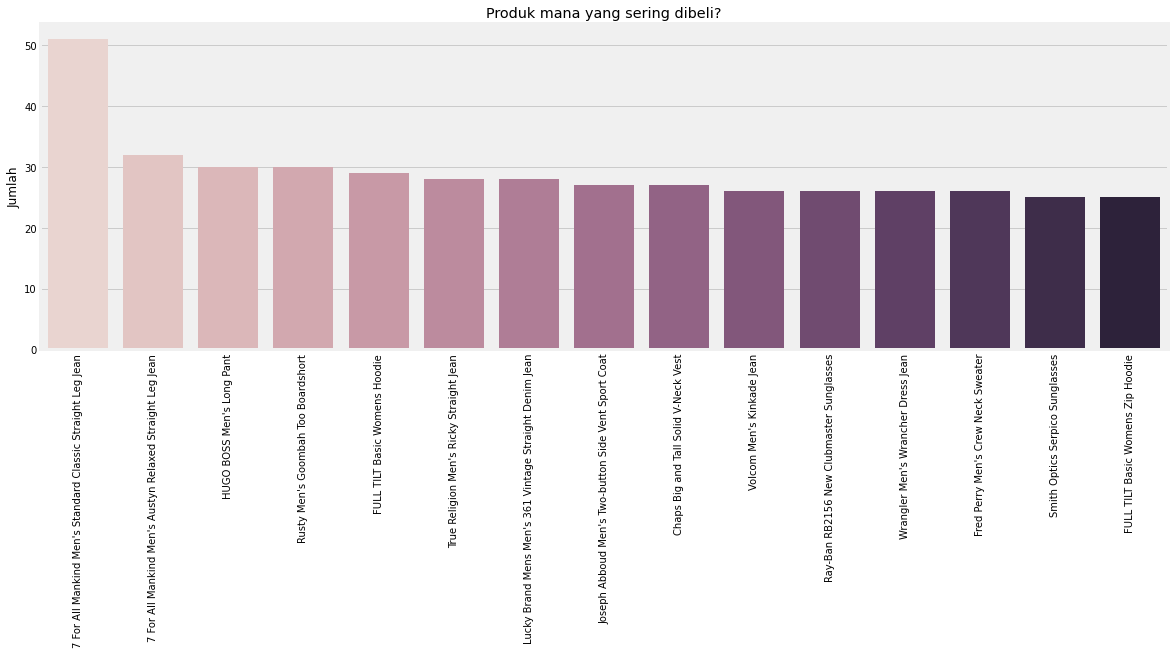

In [ ]:
item_counts = df['product_names'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Jumlah")
plt.title("Produk mana yang sering dibeli?");
plt.xticks(rotation=90);

In [ ]:
df['product_names'].value_counts().tail()

Wacoal Women's Control Freak Apple Brief    1
TYR Sport Men's Universe Racer              1
Timoteo Hero Lounge Pants White             1
Armani Exchange Blurred Logo Tee            1
Outdoor Research Peruvian Hat               1
Name: product_names, dtype: int64

In [ ]:
df[~df['product_names'].str.isupper()]['product_names'].value_counts().head()

7 For All Mankind Men's Standard Classic Straight Leg Jean    51
7 For All Mankind Men's Austyn Relaxed Straight Leg Jean      32
HUGO BOSS Men's Long Pant                                     30
Rusty Men's Goombah Too Boardshort                            30
FULL TILT Basic Womens Hoodie                                 29
Name: product_names, dtype: int64

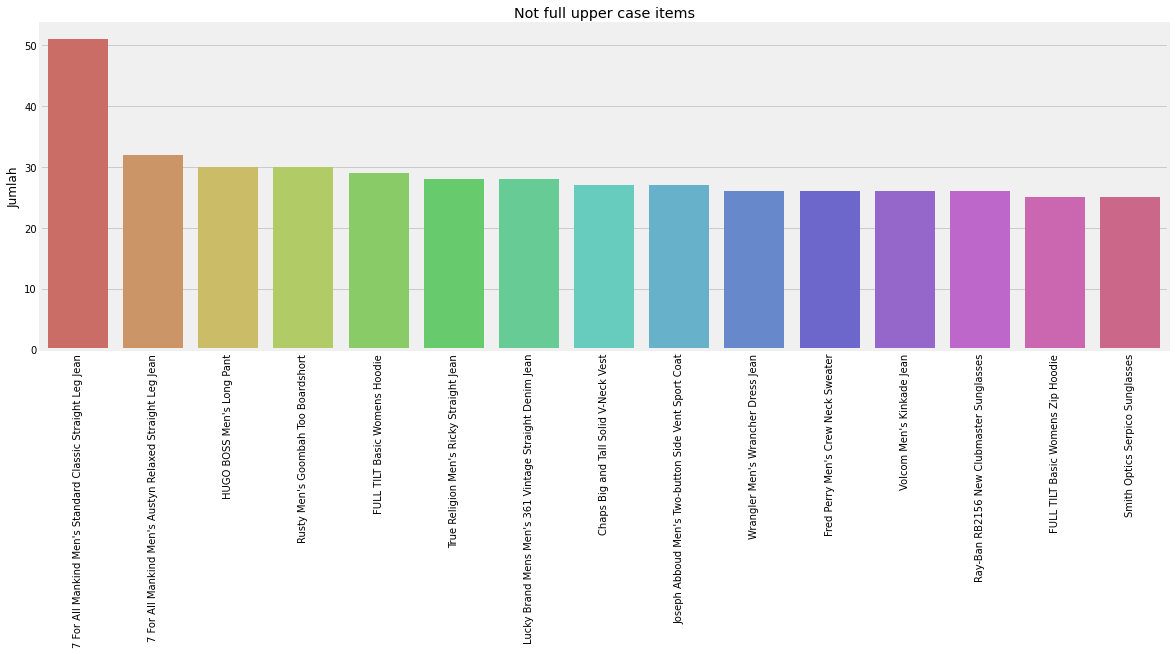

In [ ]:
lcase_counts = df[~df['product_names'].str.isupper()]['product_names'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(lcase_counts.index, lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Jumlah")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

In [ ]:
df['product_id'].value_counts().head()

22544    20
17310    18
17387    17
22949    17
26368    17
Name: product_id, dtype: int64

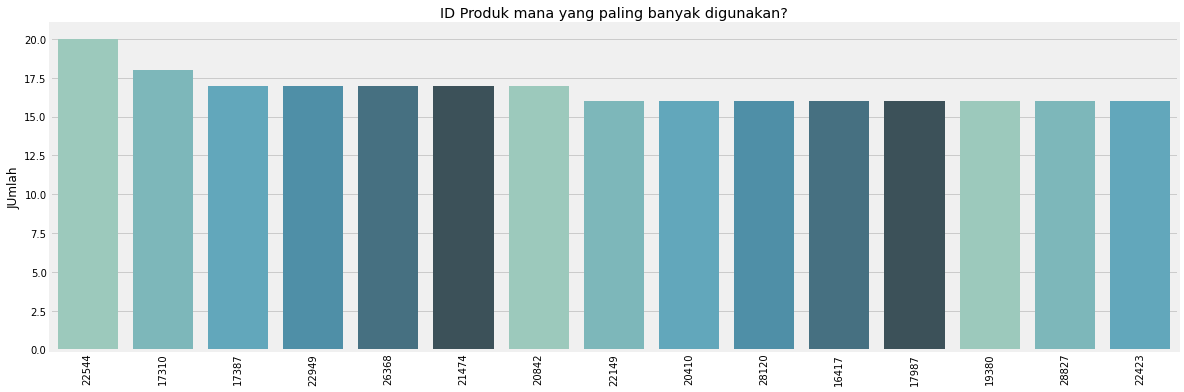

In [ ]:
stock_counts = df['product_id'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(stock_counts.index, stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("JUmlah")
plt.title("ID Produk mana yang paling banyak digunakan?");
plt.xticks(rotation=90);

In [ ]:
df['order_id'].value_counts().tail()

88521    1
93369    1
94482    1
97708    1
16718    1
Name: order_id, dtype: int64

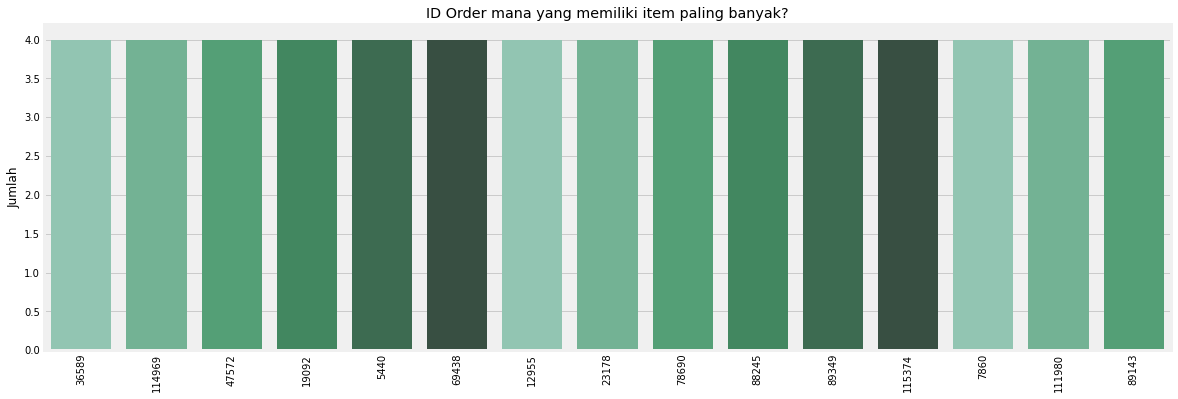

In [ ]:
inv_counts = df['order_id'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(inv_counts.index, inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Jumlah")
plt.title("ID Order mana yang memiliki item paling banyak?");
plt.xticks(rotation=90);

In [ ]:
df[df['order_id'].str.startswith('C')].describe()

,num_of_item,sale_price
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [ ]:
df = df[~df['order_id'].str.startswith('C')]

In [ ]:
df.describe()

,num_of_item,sale_price
count,101405.000000,101405.000000
mean,1.892412,74.130371
std,1.059240,74.190890
min,1.000000,0.020000
25%,1.000000,29.270000
50%,2.000000,53.500000
75%,2.000000,92.000000
max,4.000000,999.000000


In [ ]:
# df[df['Quantity'] < 0]
df[df['num_of_item'] < 0].head()

,order_id,product_id,product_names,num_of_item,sale_price,user_id,country
created_at,,,,,,,


tidak ada nilai negatif yang berati data normal

In [ ]:
df = df[df['num_of_item'] > 0]
df.describe()

,num_of_item,sale_price
count,101405.000000,101405.000000
mean,1.892412,74.130371
std,1.059240,74.190890
min,1.000000,0.020000
25%,1.000000,29.270000
50%,2.000000,53.500000
75%,2.000000,92.000000
max,4.000000,999.000000


In [ ]:
df[df['sale_price'] < 0].describe()

,num_of_item,sale_price
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [ ]:
df = df[df['sale_price'] > 0]
df.describe()

,num_of_item,sale_price
count,101405.000000,101405.000000
mean,1.892412,74.130371
std,1.059240,74.190890
min,1.000000,0.020000
25%,1.000000,29.270000
50%,2.000000,53.500000
75%,2.000000,92.000000
max,4.000000,999.000000


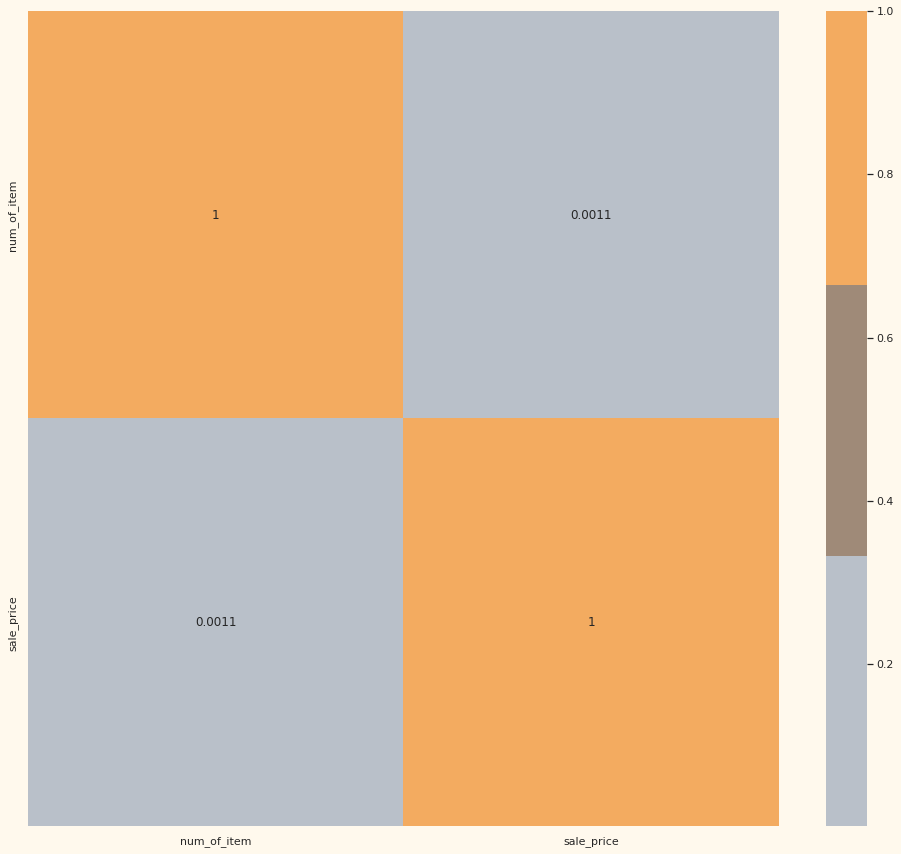

In [ ]:
#Mengatur colors prefrences
from matplotlib import colors
from matplotlib.colors import ListedColormap
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,15))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [ ]:
df['Sales'] = df['num_of_item'] * df['sale_price']
df.head()

,order_id,product_id,product_names,num_of_item,sale_price,user_id,country,Sales
created_at,,,,,,,,
2022-05-17,69979,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,1,2.5,56200,United Kingdom,2.5
2021-01-21,44006,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,3,2.5,35515,France,7.5
2021-07-26,28129,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,1,2.5,22712,Brasil,2.5
2022-02-12,27384,28951,Nice Shades Black One Size Canvas Military Web...,4,3.0,22099,China,12.0
2022-04-06,44991,28951,Nice Shades Black One Size Canvas Military Web...,1,3.0,36298,United Kingdom,3.0


###Visual EDA

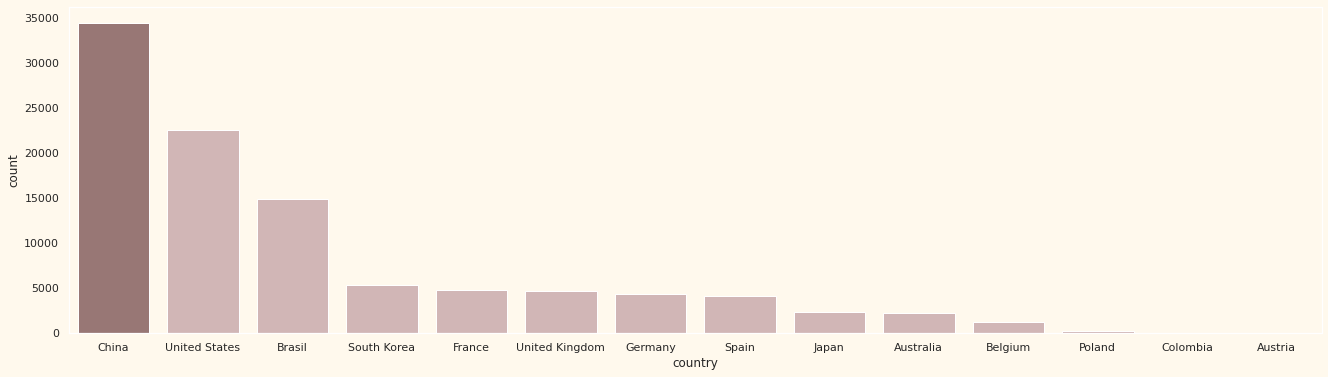

In [ ]:
country_category = df.country.value_counts().index

plt.figure(figsize=(20, 6))
sns.countplot(
    x="country",
    data=df,
    order=country_category,
    palette=["#9E726F"] + (len(country_category)-1)*["#D6B2B1"]
)
plt.grid(False)
plt.show()

In [ ]:
df['country'].value_counts()

China             34466
United States     22537
Brasil            14899
South Korea        5320
France             4762
United Kingdom     4734
Germany            4324
Spain              4184
Japan              2407
Australia          2302
Belgium            1230
Poland              211
Colombia             22
Austria               7
Name: country, dtype: int64

(array([0]), <a list of 1 Text major ticklabel objects>)

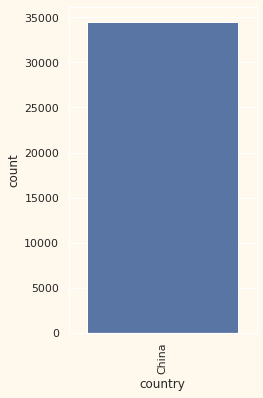

In [ ]:
plt.figure(figsize=(3,6))
sns.countplot(df[df['country'] == 'China']['country'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

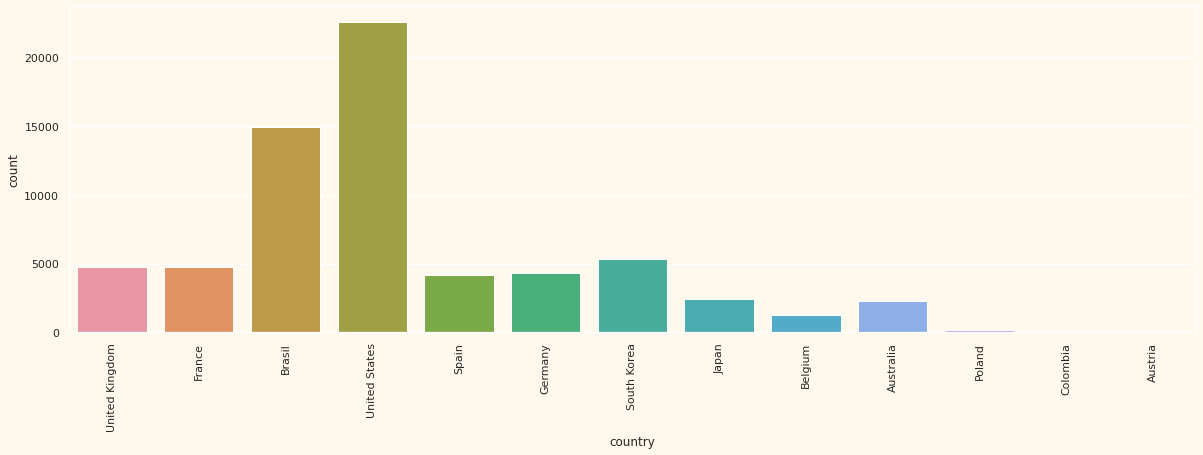

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(df[df['country'] != 'China']['country'])
plt.xticks(rotation=90)

In [ ]:
china_count = df[df['country'] == 'China']['country'].count()
all_count = df['country'].count()
china_perc = china_count/all_count
print(str('{0:.2f}%').format(china_perc*100))

33.99%


###Detecting outliers

Text(0, 0.5, 'Values')

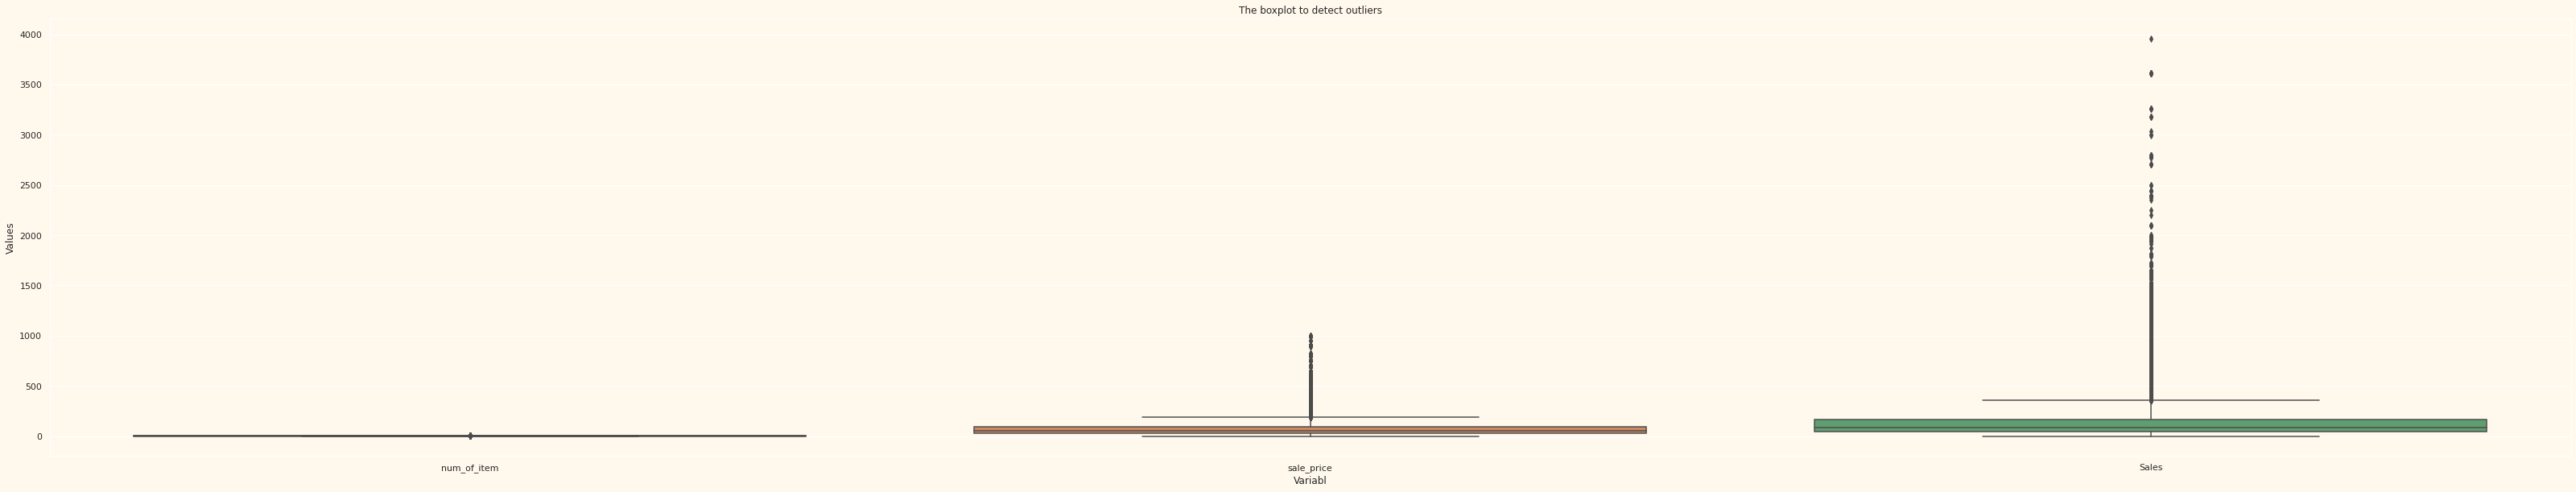

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to detect outliers')
plt.xlabel('Variabl')
plt.ylabel('Values')

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [ ]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

Text(0, 0.5, 'Values')

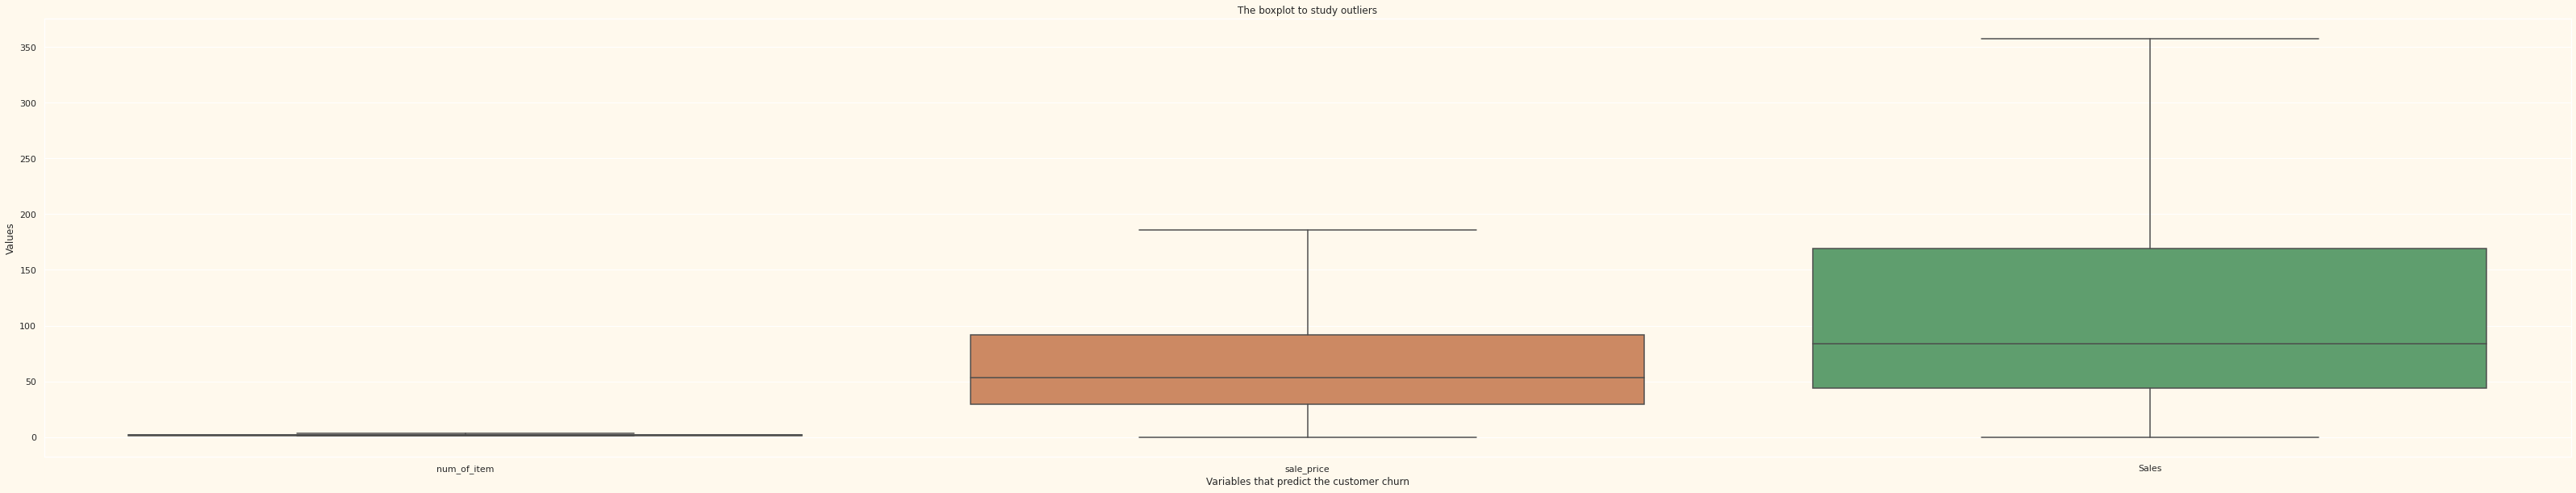

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

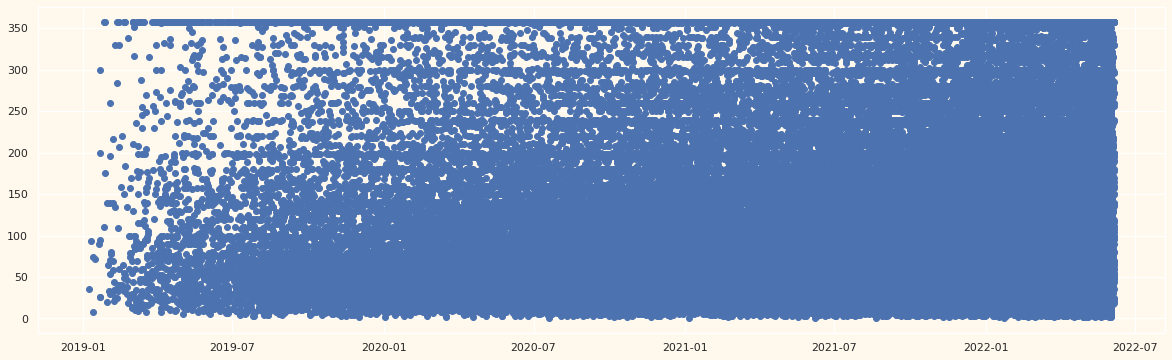

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Sales'])

(array([737060., 737241., 737425., 737607., 737791., 737972., 738156.,
        738337.]), <a list of 8 Text major ticklabel objects>)

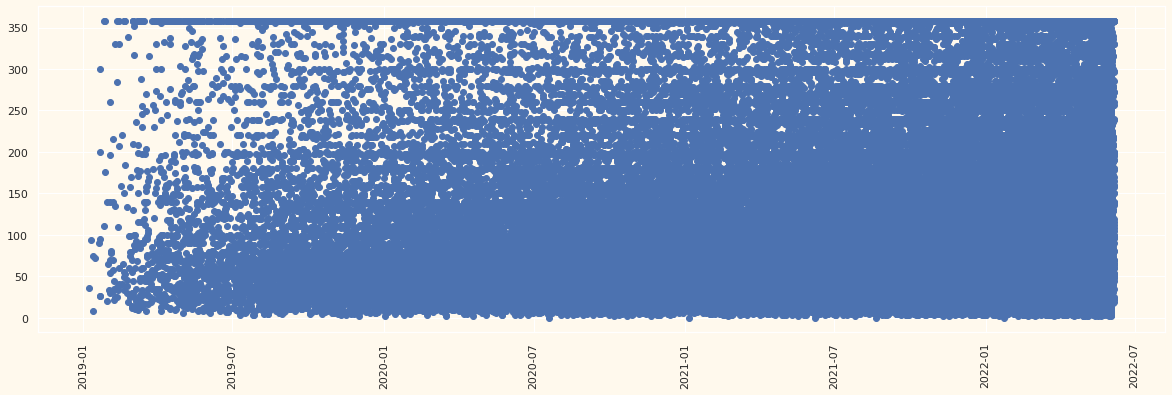

In [ ]:
df = df[df['Sales'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Sales'])
plt.xticks(rotation=90)

In [ ]:
df.quantile([0.05, 0.95, 0.98, 0.99, 0.999])

,num_of_item,sale_price,Sales
0.050,1.0,12.760000,17.50
0.950,3.5,186.094999,357.75
0.980,3.5,186.094999,357.75
0.990,3.5,186.094999,357.75
0.999,3.5,186.094999,357.75


(array([737060., 737241., 737425., 737607., 737791., 737972., 738156.,
        738337.]), <a list of 8 Text major ticklabel objects>)

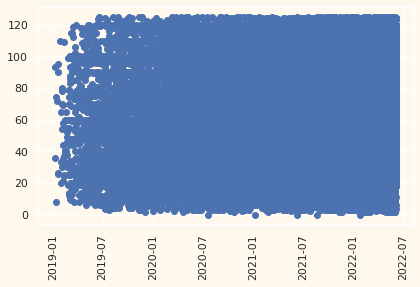

In [ ]:
df_quantile = df[df['Sales'] < 125]
plt.scatter(x=df_quantile.index, y=df_quantile['Sales'])
plt.xticks(rotation=90)

Text(0, 0.5, 'Values')

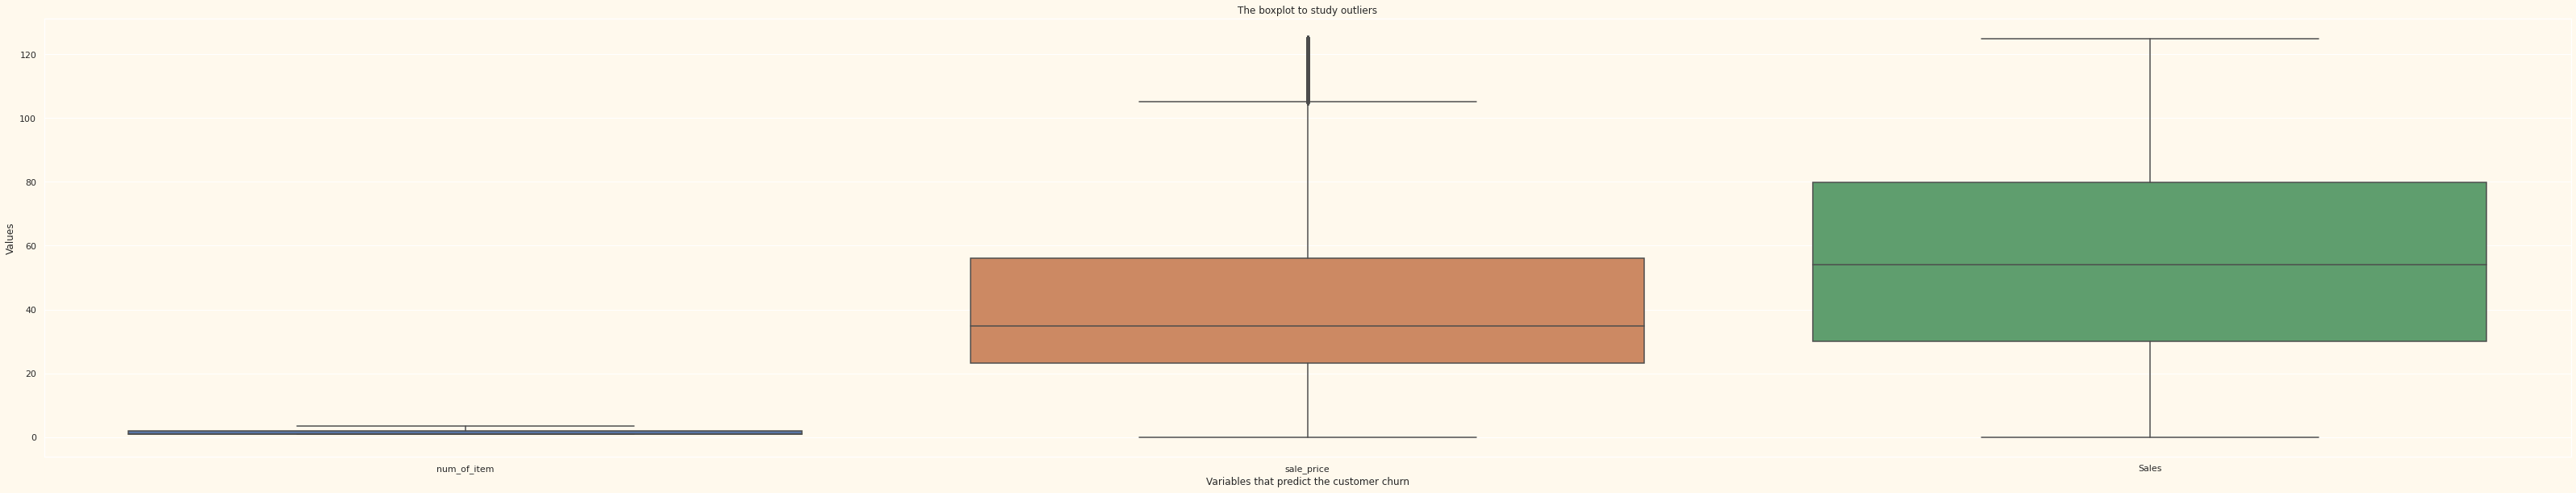

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df_quantile)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

###Visually checking distribution of numeric features

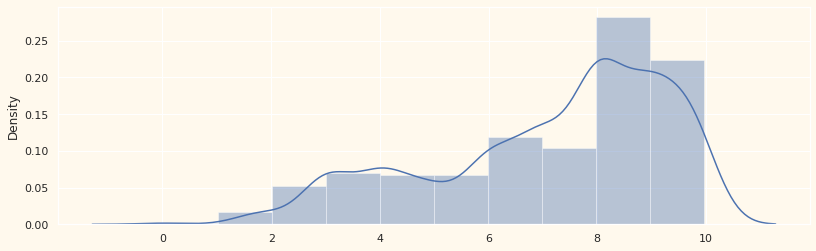

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['sale_price'] < 10]['sale_price'].values, kde=True, bins=10)

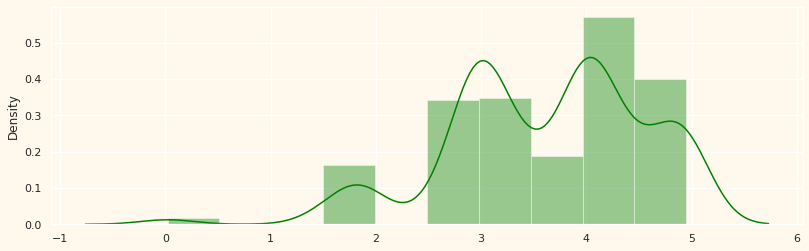

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['sale_price'] < 5]['sale_price'].values, kde=True, bins=10, color='green')

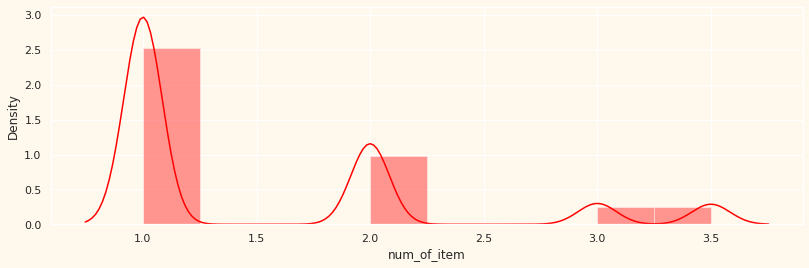

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['num_of_item'] <= 30]['num_of_item'], kde=True, bins=10, color='red')

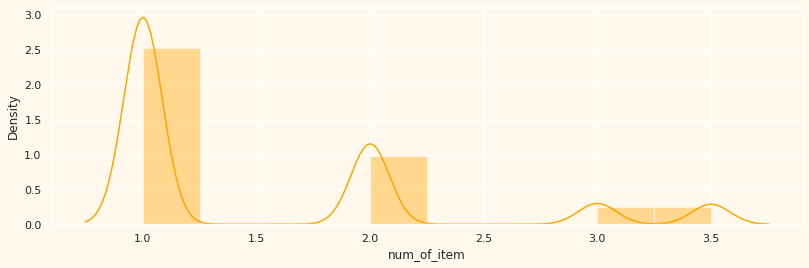

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['num_of_item'] <= 15]['num_of_item'], kde=True, bins=10, color='orange')

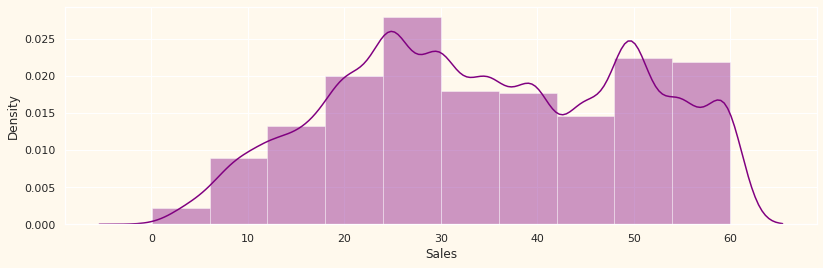

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Sales'] < 60]['Sales'], kde=True, bins=10, color='purple')

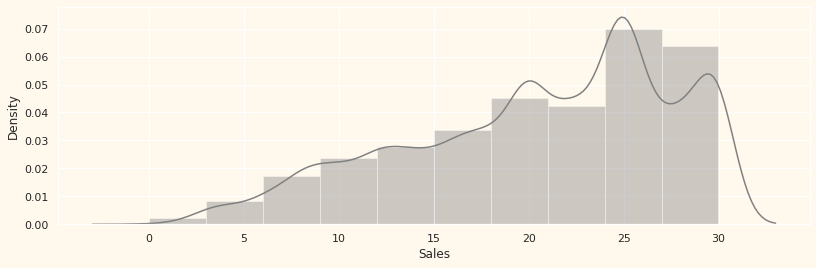

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Sales'] < 30]['Sales'], kde=True, bins=10, color='grey')

###Analysing sales over time

In [ ]:
df_ts = df[['Sales']]
df_ts.head()

,Sales
created_at,
2022-05-17,2.5
2021-01-21,7.5
2021-07-26,2.5
2022-02-12,12.0
2022-04-06,3.0


<Figure size 1296x432 with 0 Axes>

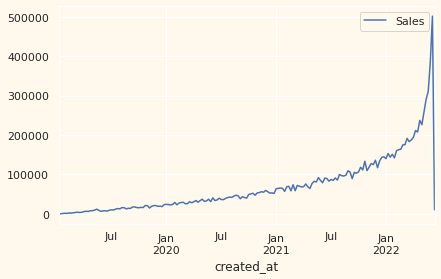

In [ ]:
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('W').sum()
df_resample.plot()

In [ ]:
df_resample['07-2020':'01-2022']

,Sales
created_at,
2020-07-05,36461.200037
2020-07-12,35986.619958
2020-07-19,39237.899890
2020-07-26,41348.829929
2020-08-02,42610.769957
...,...
2022-01-02,140009.849896
2022-01-09,153081.419884
2022-01-16,143956.879922


In [ ]:
df


,order_id,product_id,product_names,num_of_item,sale_price,user_id,country,Sales
created_at,,,,,,,,
2022-05-17,69979,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,1.0,2.500000,56200,United Kingdom,2.500000
2021-01-21,44006,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,3.0,2.500000,35515,France,7.500000
2021-07-26,28129,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,1.0,2.500000,22712,Brasil,2.500000
2022-02-12,27384,28951,Nice Shades Black One Size Canvas Military Web...,3.5,3.000000,22099,China,12.000000
2022-04-06,44991,28951,Nice Shades Black One Size Canvas Military Web...,1.0,3.000000,36298,United Kingdom,3.000000
...,...,...,...,...,...,...,...,...
2021-09-05,9921,23352,Vans Geary Shorts Black Mens,1.0,37.950001,8140,Brasil,37.950001
2020-01-28,61583,26968,Shawl Collar Waffle Diamond pattern White Colo...,2.0,37.950001,49546,Brasil,75.900002
2022-05-31,72138,24641,Smartwool PhD Run Graduated Compression Ultra ...,1.0,37.950001,57932,China,37.950001


##**Preparing data for modeling and feature creation**

Tahap ini adalah tahap persiapan untuk membangun model. Untuk melakukan ini,  perlu membuat beberapa fitur tambahan untuk membuat model kita lebih terukur.

In [ ]:
df_clean = df[df['sale_price'] < 15]
df_clean.describe()

,num_of_item,sale_price,Sales
count,6752.000000,6752.000000,6752.000000
mean,1.813611,10.130216,19.115271
std,0.927946,3.174229,12.797863
min,1.000000,0.020000,0.020000
25%,1.000000,7.990000,10.000000
50%,2.000000,10.500000,14.000000
75%,2.000000,12.760000,25.800001
max,3.500000,14.970000,59.880001


In [ ]:
df_clean.index

DatetimeIndex(['2022-05-17', '2021-01-21', '2021-07-26', '2022-02-12',
               '2022-04-06', '2022-05-22', '2022-02-15', '2019-09-02',
               '2022-01-12', '2021-08-09',
               ...
               '2021-03-06', '2021-09-24', '2021-05-04', '2022-01-26',
               '2022-03-26', '2020-03-15', '2019-12-01', '2021-12-02',
               '2021-09-25', '2022-04-18'],
              dtype='datetime64[ns]', name='created_at', length=6752, freq=None)

###Quantity per order_id feature

Fitur yang dapat mempengaruhi hasil penjualan dapat berupa "Jumlah pembelian per order ID",
dimana num_of_item = quantity

In [ ]:
df_join = df_clean.groupby('order_id')[['num_of_item']].sum()

In [ ]:
df_join = df_join.reset_index()
df_join.head()

,order_id,num_of_item
0,100005,1.0
1,100011,3.0
2,100019,6.0
3,100082,2.0
4,100091,1.0


In [ ]:
df_clean['created_at'] = df_clean.index
df_clean = df_clean.merge(df_join, how='left', on='order_id')
df_clean = df_clean.rename(columns={'num_of_item_x' : 'num_of_item', 'num_of_item_y' : 'num_of_itemOdr'})
df_clean.tail(15)

,order_id,product_id,product_names,num_of_item,sale_price,user_id,country,Sales,created_at,num_of_itemOdr
6737,111722,5229,Allegra K Ladies Multicolor Elastic Waist Flow...,1.0,12.91,89718,Brasil,12.91,2022-06-01,1.0
6738,103462,10864,Hanes Women's Body Creations Microfiber Hi-Cut...,2.0,13.41,83070,China,26.82,2021-05-14,2.0
6739,92880,10863,Hanes Women's Body Creations Microfiber Hipste...,1.0,13.41,74539,China,13.41,2019-11-07,1.0
6740,53468,7727,Allegra K Ladies Long Sleeve Knit Flower Neck ...,1.0,14.41,43047,Brasil,14.41,2022-02-06,1.0
6741,93813,7727,Allegra K Ladies Long Sleeve Knit Flower Neck ...,1.0,14.41,75293,United States,14.41,2022-03-15,1.0
6742,115832,7727,Allegra K Ladies Long Sleeve Knit Flower Neck ...,3.0,14.41,93055,Germany,43.23,2021-03-06,3.0
6743,110667,628,Hyp Women's Short Sleeve Neptune Cotton Raglan...,3.0,3.11,88881,China,9.33,2021-09-24,3.0
6744,32364,628,Hyp Women's Short Sleeve Neptune Cotton Raglan...,1.0,3.11,26154,Australia,3.11,2021-05-04,1.0
6745,73078,628,Hyp Women's Short Sleeve Neptune Cotton Raglan...,1.0,3.11,58669,United States,3.11,2022-01-26,1.0
6746,73590,5716,Brown Seamless Leggings Full Length,1.0,7.90,59068,Japan,7.90,2022-03-26,1.0


In [ ]:
df_clean.describe()

,num_of_item,sale_price,Sales,num_of_itemOdr
count,6752.000000,6752.000000,6752.000000,6752.000000
mean,1.813611,10.130216,19.115271,1.941277
std,0.927946,3.174229,12.797863,1.265137
min,1.000000,0.020000,0.020000,1.000000
25%,1.000000,7.990000,10.000000,1.000000
50%,2.000000,10.500000,14.000000,2.000000
75%,2.000000,12.760000,25.800001,2.000000
max,3.500000,14.970000,59.880001,10.500000


In [ ]:
df_clean['created_at'] = pd.to_datetime(df_clean['created_at'])

In [ ]:
df_clean.dtypes

order_id                  object
product_id                object
product_names             object
num_of_item              float64
sale_price               float64
user_id                   object
country                   object
Sales                    float64
created_at        datetime64[ns]
num_of_itemOdr           float64
dtype: object

###Bucketizing Quantity and UnitPrice features

Data binning (atau bucketing) mengelompokkan data dalam bin (atau bucket), dalam artian menggantikan nilai yang terdapat dalam interval kecil dengan nilai perwakilan tunggal untuk interval tersebut. Terkadang binning meningkatkan akurasi dalam model prediktif.

Berdasarkan EDA yang dilakukan sebelumnya, kami dapat mengelompokkan fitur-fitur ini menjadi 6 bucket untuk num_of_item dan 5 untuk sale_price menggunakan metode pandas .cut().

In [ ]:
bins_q = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])
df_clean['num_of_itemRange'] = pd.cut(df_clean['num_of_item'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
df_clean['PriceRange'] = pd.cut(df_clean['sale_price'], bins=bins_p)
df_clean.head()

,order_id,product_id,product_names,num_of_item,sale_price,user_id,country,Sales,created_at,num_of_itemOdr,num_of_itemRange,PriceRange
0,69979,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,1.0,2.5,56200,United Kingdom,2.5,2022-05-17,1.0,"(0, 2]","(2, 3]"
1,44006,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,3.0,2.5,35515,France,7.5,2021-01-21,6.0,"(2, 5]","(2, 3]"
2,28129,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,1.0,2.5,22712,Brasil,2.5,2021-07-26,1.0,"(0, 2]","(2, 3]"
3,27384,28951,Nice Shades Black One Size Canvas Military Web...,3.5,3.0,22099,China,12.0,2022-02-12,3.5,"(2, 5]","(2, 3]"
4,44991,28951,Nice Shades Black One Size Canvas Military Web...,1.0,3.0,36298,United Kingdom,3.0,2022-04-06,1.0,"(0, 2]","(2, 3]"


###Extracting and bucketizing dates


Kami telah memperhatikan bahwa tergantung pada musim, hadiah dijual secara berbeda: pilihan penjualan ada di Q4, kemudian melandai di Q1 tahun depan dan terus tumbuh hingga pick baru di Q4 lagi. Dari pengamatan ini kami dapat membuat fitur lain yang dapat meningkatkan model kami

In [ ]:
df_clean['Month'] = df_clean['created_at'].dt.month
df_clean.head()

,order_id,product_id,product_names,num_of_item,sale_price,user_id,country,Sales,created_at,num_of_itemOdr,num_of_itemRange,PriceRange,Month
0,69979,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,1.0,2.5,56200,United Kingdom,2.5,2022-05-17,1.0,"(0, 2]","(2, 3]",5
1,44006,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,3.0,2.5,35515,France,7.5,2021-01-21,6.0,"(2, 5]","(2, 3]",1
2,28129,13606,Elegant PASHMINA SCARF WRAP SHAWL STOLE,1.0,2.5,22712,Brasil,2.5,2021-07-26,1.0,"(0, 2]","(2, 3]",7
3,27384,28951,Nice Shades Black One Size Canvas Military Web...,3.5,3.0,22099,China,12.0,2022-02-12,3.5,"(2, 5]","(2, 3]",2
4,44991,28951,Nice Shades Black One Size Canvas Military Web...,1.0,3.0,36298,United Kingdom,3.0,2022-04-06,1.0,"(0, 2]","(2, 3]",4


In [ ]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df_clean['DateRange'] = pd.cut(df_clean['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
df_clean.tail()

,order_id,product_id,product_names,num_of_item,sale_price,user_id,country,Sales,created_at,num_of_itemOdr,num_of_itemRange,PriceRange,Month,DateRange
6747,84299,23214,Burnside Men's Emblem Burnside's Corduroy Short,3.5,7.9,67615,United States,31.6,2020-03-15,3.5,"(2, 5]","(4, 20]",3,"(0, 3]"
6748,15132,23214,Burnside Men's Emblem Burnside's Corduroy Short,3.0,7.9,12298,China,23.7,2019-12-01,3.0,"(2, 5]","(4, 20]",12,"(9, 12]"
6749,11704,6950,Orange French Terry Shorts with Drawstring and...,1.0,7.9,9564,China,7.9,2021-12-02,1.0,"(0, 2]","(4, 20]",12,"(9, 12]"
6750,90915,23214,Burnside Men's Emblem Burnside's Corduroy Short,2.0,7.9,72939,United Kingdom,15.8,2021-09-25,2.0,"(0, 2]","(4, 20]",9,"(6, 9]"
6751,99600,23214,Burnside Men's Emblem Burnside's Corduroy Short,1.0,7.9,79875,Spain,7.9,2022-04-18,1.0,"(0, 2]","(4, 20]",4,"(3, 6]"


##**Model Development**

####Splitting data

Kami harus menganalisis 2 kumpulan data ini secara terpisah untuk mendapatkan data yang lebih terstandarisasi untuk sebuah model, karena mungkin ada beberapa pola yang berfungsi untuk negara lain dan tidak untuk China atau sebaliknya. Juga hipotesis untuk diuji - apakah model yang dibuat untuk China berkinerja baik pada data untuk negara lain?

In [ ]:
df_china = df_clean[df_clean['country'] == 'China']
df_abroad = df_clean[df_clean['country'] != 'China']

In [ ]:
df_china.head()

,order_id,product_id,product_names,num_of_item,sale_price,user_id,country,Sales,created_at,num_of_itemOdr,num_of_itemRange,PriceRange,Month,DateRange
3,27384,28951,Nice Shades Black One Size Canvas Military Web...,3.5,3.0,22099,China,12.0,2022-02-12,3.5,"(2, 5]","(2, 3]",2,"(0, 3]"
5,115457,28951,Nice Shades Black One Size Canvas Military Web...,1.0,3.0,92754,China,3.0,2022-05-22,1.0,"(0, 2]","(2, 3]",5,"(3, 6]"
6,118415,28951,Nice Shades Black One Size Canvas Military Web...,2.0,3.0,95143,China,6.0,2022-02-15,2.0,"(0, 2]","(2, 3]",2,"(0, 3]"
7,5355,15784,Dainty Floral Embroidered Cotton Handkerchief ...,2.0,3.5,4396,China,7.0,2019-09-02,2.0,"(0, 2]","(3, 4]",9,"(6, 9]"
8,15929,15917,Keds Popcorn Socks in 3 Pack Different Style G...,1.0,3.5,12935,China,3.5,2022-01-12,1.0,"(0, 2]","(3, 4]",1,"(0, 3]"


###Extracting features and creating dummy variables

In [ ]:
df_china_model = df_china[['sale_price', 'num_of_itemOdr', 'num_of_itemRange', 'PriceRange', 'DateRange']]
df_china_model.head()

,sale_price,num_of_itemOdr,num_of_itemRange,PriceRange,DateRange
3,3.0,3.5,"(2, 5]","(2, 3]","(0, 3]"
5,3.0,1.0,"(0, 2]","(2, 3]","(3, 6]"
6,3.0,2.0,"(0, 2]","(2, 3]","(0, 3]"
7,3.5,2.0,"(0, 2]","(3, 4]","(6, 9]"
8,3.5,1.0,"(0, 2]","(3, 4]","(0, 3]"


In [ ]:
df_data = df_china_model.copy()
df_data = pd.get_dummies(df_data, columns=['num_of_itemRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

,sale_price,num_of_itemOdr,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
3,3.0,3.5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
5,3.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,3.0,2.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7,3.5,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8,3.5,1.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


###Scaling

Karena sebagian besar fitur kami berada dalam kisaran 0-1, masuk akal untuk menskalakan fitur "num_of_itemOdr" juga. Secara umum, fitur penskalaan biasanya merupakan ide yang bagus.

In [ ]:
from sklearn.preprocessing import scale
df_data['num_of_itemOdr'] = scale(df_data['num_of_itemOdr'])

###Train-Test Split


Sekarang kita harus split data kita menjadi train-test data untuk dapat melmelakukan training model yang digunakan dan memvalidasi kapabilitasnya

In [ ]:
y = df_data['sale_price']
X = df_data.drop(columns=['sale_price'])

X = bebas
y = Terikat

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

ada 4 variabel yang digunakan
X_train
X_test
y_train
y_test = train_test_split

untuk parameter yang digunakan yaitu X, y, test_size = 0.20, random_state=42
dan untuk test_size say ingin membaginya menjadi 20% (0,2)

In [ ]:
(X_train)

,num_of_itemOdr,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
5304,1.282492,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
5402,0.879035,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
6107,-0.734794,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4908,-0.734794,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6019,1.282492,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,0.072121,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3331,1.282492,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3429,-0.734794,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3875,-0.734794,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
len (X_test)

464

In [ ]:
y_train

5304    13.66
5402    13.75
6107    10.36
4908    14.97
6019     6.29
        ...  
4890    13.97
3331     9.54
3429    13.72
3875     7.99
2628    12.75
Name: sale_price, Length: 1852, dtype: float64

###Testing and validating different models

Di sini menggunakan GridSearch dan CrossValidation untuk menguji tiga jenis regressor: Linear, DecisionTree dan RandomForest

In [ ]:
# Linear Regression
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

# Decision Tree
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

# Random Forest
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  # Print the tuned parameters and score (Root Mean Squared Error (RMSE)and Mean Absolute Error (MAE) )
  print(" === Start report for regressor {} ===".format(model))
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_)) 
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))

  # Compute metrics
  mae_dict[model] = mean_absolute_error(y_test, y_pred)
  print("MAE for {}".format(model))
  print(mean_absolute_error(y_test, y_pred))
  mse_dict[model] = mean_squared_error(y_test, y_pred)
  print("MSE for {}".format(model))
  print(mean_squared_error(y_test, y_pred))
  r2_dict[model] = r2_score(y_test, y_pred)
  print("R2 score for {}".format(model))
  print(r2_score(y_test, y_pred))
  print(" === End of report for regressor {} === \n".format(model))
  
  # Add best estimator to the dict
  best_est_dict[model] = regressor.best_estimator_

 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': False}
Best score is 0.31184400080154806
MAE for LinearRegression
2.145546556741379
MSE for LinearRegression
6.760502207341778
R2 score for LinearRegression
0.26737920838320506
 === End of report for regressor LinearRegression === 

 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.30065595784216026
MAE for DecisionTreeRegressor
2.144827706275444
MSE for DecisionTreeRegressor
6.8581007022323694
R2 score for DecisionTreeRegressor
0.25680267362374554
 === End of report for regressor DecisionTreeRegressor === 

 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score is 0.30634925754756515
MAE for RandomForest
2.143874808147964
MSE for RandomForest
6.861366655975136
R2 score for RandomForest
0.256448749382169
 === End of rep

Root Mean Squared Error (RMSE) dan Mean Absolute Error (MAE) adalah metrik yang digunakan untuk mengevaluasi Model Regresi. Metrik ini memberi tahu kami seberapa akurat prediksi kami dan, berapa jumlah penyimpangan dari nilai sebenarnya.


R2 adalah ukuran kebaikan kecocokan suatu model. Dalam regresi, koefisien determinasi R2 adalah ukuran statistik seberapa baik prediksi regresi mendekati titik data sebenarnya. R2 dari 1 menunjukkan bahwa prediksi regresi sangat cocok dengan data.

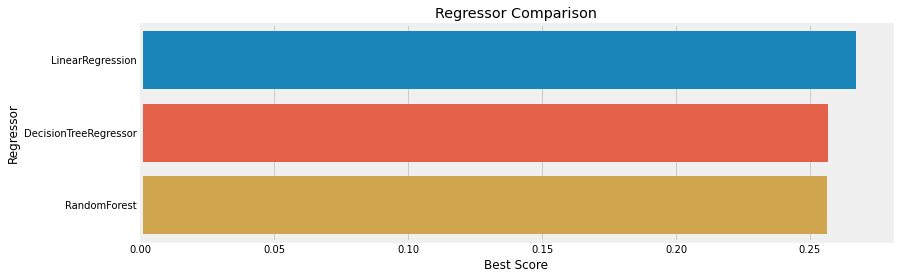

In [ ]:
# Creating summary report
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_cols
summary = summary.reset_index()

# Visualizing results
plt.figure(figsize=(12,4))
plt.xlabel('Best score')
plt.title('Regressor Comparison')

sns.barplot(x='Best Score', y='Regressor', data=summary)

Dapat dilihat hasil uji 3 regresor tersebut dapat disimpulkan bahwa scor uji tertinggi ada pada Linear Regression

hasil Analysis :

- Pelanggan dengan jumlah pesanan terbanyak berasal dari China yaitu sebesar 33.99%
- Penjulanan mengalami peningkatan dari tahun ke tahun
- Produk yang paling sering di beli adalah produk "7 For all mankind men's standard classic straight leg jean"
model dengan score predict tertinggi adalah linear regression

In [ ]:
df.dtypes

order_id          object
product_id        object
product_names     object
num_of_item      float64
sale_price       float64
user_id           object
country           object
Sales            float64
dtype: object

In [ ]:
from google.colab import files
df.to_csv('SALES_DEPARTEMENT.csv') 
files.download('SALES_DEPARTEMENT.csv')